In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from chart_studio import plotly
import cufflinks as cf
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import Dash, dcc, html, Output, Input
import math

from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/india-tourism-20142020/Top 10 State Visit.csv
/kaggle/input/india-tourism-20142020/Country Wise Visitors Ways.csv
/kaggle/input/india-tourism-20142020/Top10 State FFA Visit.csv
/kaggle/input/india-tourism-20142020/Month Wise FFE Dollar.csv
/kaggle/input/india-tourism-20142020/Country Wise Yearly VIsitors.csv
/kaggle/input/india-tourism-20142020/Country Wise Gender.csv
/kaggle/input/india-tourism-20142020/Country Wise Age Group.csv
/kaggle/input/india-tourism-20142020/Country Quater Wise Visitors.csv
/kaggle/input/india-tourism-20142020/General Data 2014-2020.csv
/kaggle/input/india-tourism-20142020/Top 10 Country FFA.csv
/kaggle/input/india-tourism-20142020/Month Wise FFA.csv
/kaggle/input/india-tourism-20142020/Country Wise Airport.csv


**A study on foreign tourists entering India from 2014 to 2020 with the use of Python Pandas and with Plotly for the data visualization.**

![Tourism in India](https://imgnew.outlookindia.com/public/uploads/articles/2019/7/8/foreign-tourists.jpg) ![]()

In [6]:
#reading the datasets
general = pd.read_csv("../input/india-tourism-20142020/General Data 2014-2020.csv")
top10 = pd.read_csv("../input/india-tourism-20142020/Top 10 Country FFA.csv")
top10states = pd.read_csv("../input/india-tourism-20142020/Top 10 State Visit.csv")

In [7]:
general.head()

,year,noftaii,noftaiiagr,noindfi,noindfiagr,nodtvasu,nodtvasuagr,feeftit,feeftitagr,feeftust,...,apfitr,apritragr,ipwiita,ipwirwta,ipwsiitr,ipwirwtr,ipaprita,ipaprirta,ipapritr,ipaprirtr
0,2014,7.68,10.2,18.33,10.3,1290.00,12.9,123320,14.5,20.240,...,377.0,4.7,0.68,41,1.62,15,2.91,12,5.37,8
1,2015,8.03,4.5,20.38,11.1,1432.00,11.6,135193,9.6,21.070,...,418.9,-0.3,0.68,40,1.71,14,2.88,11,5.03,7
2,2016,8.80,9.7,21.87,7.3,1613.60,12.7,154146,14.0,22.920,...,366.7,4.9,1.18,25,1.88,13,4.72,8,6.25,7
3,2017,10.04,14.0,23.94,9.5,1652.49,2.3,177874,15.4,27.310,...,389.5,5.0,1.17,26,2.05,13,4.81,7,7.01,7
4,2018,10.56,5.2,26.30,9.8,1854.90,11.9,194892,9.6,28.585,...,432.9,9.3,1.24,25,1.97,13,5.05,7,6.60,7


**How many tourists visited India each year from 2014 till 2020?**

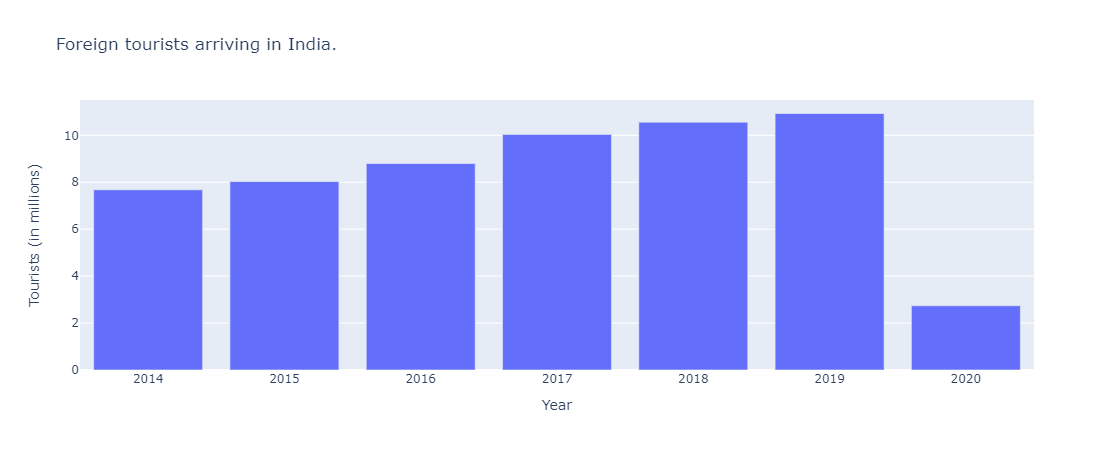

In [9]:
#noftaii = number of tourists arriving in India
#Plotting the graph with Plotly
px.bar(general, x="year", y="noftaii", 
       labels={"year":"Year", "noftaii": "Tourists (in millions)"},
       title="Foreign tourists arriving in India.")

**Where did these people came from?**

In [9]:
#Reshaping the dataframe, so it is possible to use with Plotly
dfnew1 = pd.DataFrame(columns=["year", "country","visitors"])
for x in range(7):
    year = 2014 + x
    fourteen = top10[top10["year"] == year]
    visitors = [fourteen._get_value(0 + x, "top1_ftas"), fourteen._get_value(0 + x, "top2_ftas"),fourteen._get_value(0 + x, "top3_ftas"),fourteen._get_value(0 + x, "top4_ftas"),fourteen._get_value(0 + x, "top5_ftas"),fourteen._get_value(0 + x, "top6_ftas"),fourteen._get_value(0 + x, "top7_ftas"),fourteen._get_value(0 + x, "top8_ftas"),fourteen._get_value(0 + x, "top9_ftas"),fourteen._get_value(0 + x, "top10_ftas")]
    countries = [fourteen._get_value(0 + x, "top1_country"), fourteen._get_value(0 + x, "top2_country"),fourteen._get_value(0 + x, "top3_country"),fourteen._get_value(0 + x, "top4_country"),fourteen._get_value(0 + x, "top5_country"),fourteen._get_value(0 + x, "top6_country"),fourteen._get_value(0 + x, "top7_country"),fourteen._get_value(0 + x, "top8_country"),fourteen._get_value(0 + x, "top9_country"),fourteen._get_value(0 + x, "top10_country")]
    d1 = {"year": year, "country": countries, "visitors": visitors}
    df1 = pd.DataFrame(data=d1,columns=["year", "country","visitors"])
    dfnew1 = dfnew1.append(df1, ignore_index=True)

In [12]:
#Overview of the newly created dataframe.
#Ideal dataframe to use in Plotly to plot with an animation frame, see next cell with code.
print(dfnew1)

    year         country visitors
0   2014   United States  1118983
1   2014      Bangladesh   942562
2   2014  United Kingdom   838860
3   2014       Sri Lanka   301601
4   2014    Russian Fed.   269832
..   ...             ...      ...
65  2020       Australia    86758
66  2020          France    74243
67  2020         Germany    72558
68  2020        Malaysia    69897
69  2020       Sri Lanka    68646

[70 rows x 3 columns]


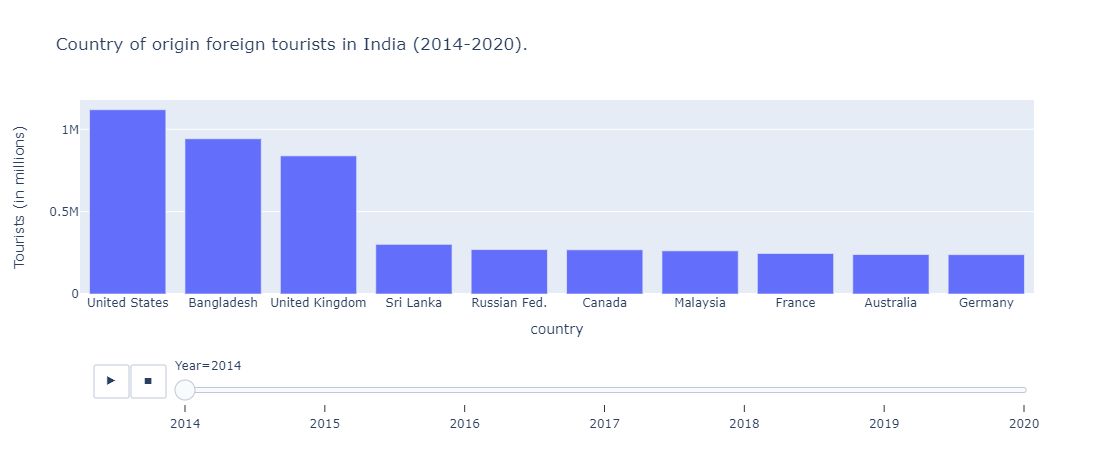

In [10]:
#Plotting with Plotly. A graph with animation frame
fig1 = px.bar(dfnew1, x="country", y="visitors", animation_frame="year", 
       labels={"year":"Year", "visitors": "Tourists (in millions)"},
       title="Country of origin foreign tourists in India (2014-2020).")
fig1.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

yranges = {2016:[0, 2500000]}

for f in fig1.frames:
    if int(f.name) in yranges.keys():
        f.layout.update(yaxis_range = yranges[int(f.name)])
fig1.show()

**Which states in India were the most visited?**

In [13]:
#reading the data
top10states.head()

,year,top1_state,top1_ftv,top2_state,top2_ftv,top3_state,top3_ftv,top4_state,top4_ftv,top5_state,...,top6_state,top6_ftv,top7_state,top7_ftv,top8_state,top8_ftv,top9_state,top9_ftv,top10_state,top10_ftv
0,2014.0,Tamil Nadu,327555233,Uttar Pradesh,182820108,Karnataka,118283220,Maharashtra,94127124,Andhra Pradesh,...,Telengana,72399113,Madhya Pradesh,63614525,West Bengal,49029590,Jharkhand,33427144,Rajasthan,33076491
1,2015.0,Tamil Nadu,333459047,Uttar Pradesh,204888457,Andhra Pradesh,121591054,Karnataka,119863942,Maharashtra,...,Telengana,94516316,Madhya Pradesh,77975738,West Bengal,70193450,Gujarat,36288463,Rajasthan,35187573
2,2016.0,Tamil Nadu,343812413,Uttar Pradesh,211707090,Andhra Pradesh,153163352,Madhya Pradesh,150490339,Karnataka,...,Maharashtra,116515801,Telengana,95160830,West Bengal,74460250,Gujarat,42252909,Rajasthan,41495115
3,2017.0,Tamil Nadu,385909376,Uttar Pradesh,233977619,Karnataka,179980191,Andhra Pradesh,165433898,Maharashtra,...,Telengana,85266596,West Bengal,79687645,Madhya Pradesh,78038522,Gujarat,48343121,Rajasthan,45916573
4,2018.0,Tamil Nadu,385909376,Uttar Pradesh,285079848,Karnataka,214306456,Andhra Pradesh,194767874,Maharashtra,...,Telengana,92878329,West Bengal,85657365,Madhya Pradesh,83969799,Gujarat,54369873,Rajasthan,50235643


In [14]:
#Reshaping the dataframe, so it is possible to use with Plotly
dfnew2 = pd.DataFrame(columns=["year","guests","states"])
for x in range(7):
    year = 2014 + x
    setstate = top10states[top10states["year"] == year]
    guests = [setstate._get_value(0 + x, "top1_ftv"), setstate._get_value(0 + x, "top2_ftv"), setstate._get_value(0 + x, "top3_ftv"), setstate._get_value(0 + x, "top4_ftv"),setstate._get_value(0 + x, "top5_ftv"), setstate._get_value(0 + x, "top6_ftv"), setstate._get_value(0 + x, "top7_ftv"), setstate._get_value(0 + x, "top8_ftv"), setstate._get_value(0 + x, "top9_ftv"), setstate._get_value(0 + x, "top10_ftv")]
    states = [setstate._get_value(0 + x, "top1_state"), setstate._get_value(0 + x, "top2_state"), setstate._get_value(0 + x, "top3_state"), setstate._get_value(0 + x, "top4_state"),setstate._get_value(0 + x, "top5_state"), setstate._get_value(0 + x, "top6_state"), setstate._get_value(0 + x, "top7_state"), setstate._get_value(0 + x, "top8_state"), setstate._get_value(0 + x, "top9_state"), setstate._get_value(0 + x, "top10_state")]
    d2 = {"year": year, "guests": guests, "states": states}
    df2 = pd.DataFrame(data=d2, columns=["year","guests","states"])
    dfnew2 = dfnew2.append(df2, ignore_index=True)

In [17]:
#Overview of the newly created dataframe.
#Ideal dataframe to use in Plotly to plot with an animation frame, see next cell with code.
print(dfnew2)

    year      guests          states
0   2014  3275552.33      Tamil Nadu
1   2014  1828201.08   Uttar Pradesh
2   2014   1182832.2       Karnataka
3   2014   941271.24     Maharashtra
4   2014   933069.74  Andhra Pradesh
..   ...         ...             ...
65  2020   392345.91     Maharashtra
66  2020   288417.32     West Bengal
67  2020   235196.32  Madhya Pradesh
68  2020   194645.17         Gujarat
69  2020   166921.97          Punjab

[70 rows x 3 columns]


In [15]:
#There was a little mistake in the amount of guests visiting India. It is 100 times too much.
#So I divide this by 100
dfnew2["guests"] = dfnew2["guests"] / 100
print(dfnew2.head(1))
print(dfnew2.tail(1))

   year      guests      states
0  2014  3275552.33  Tamil Nadu
    year     guests  states
69  2020  166921.97  Punjab


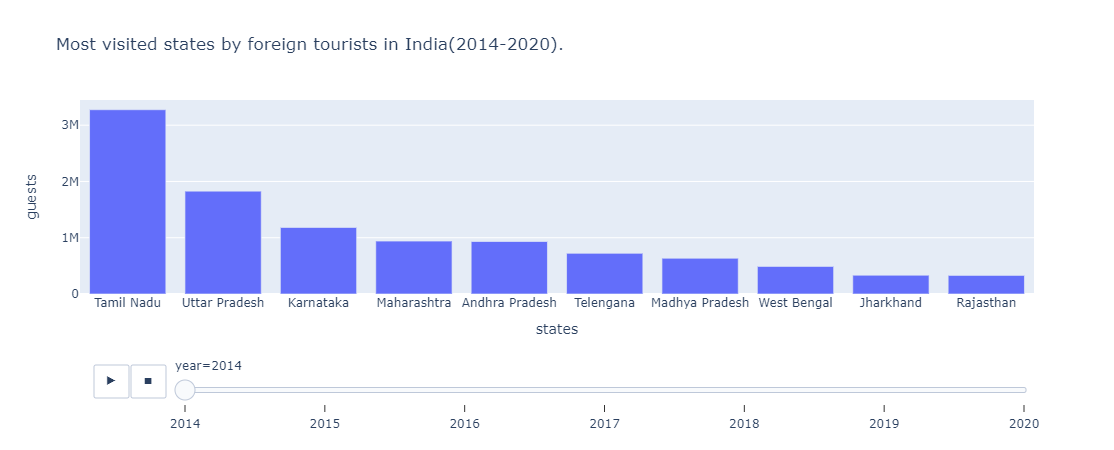

In [18]:
#plotting the graph
fig2 = px.bar(dfnew2, x="states", y="guests", animation_frame="year", 
       labels={"states":"states", "visitors": "Tourists (in millions)"},
       title="Most visited states by foreign tourists in India(2014-2020).")
fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

yranges = {2018:[0, 6000000]}

for f in fig2.frames:
    if int(f.name) in yranges.keys():
        f.layout.update(yaxis_range = yranges[int(f.name)])


fig2.show()

**Let's plot the share of arrivals in India, with the arrivals in the rest of the world**

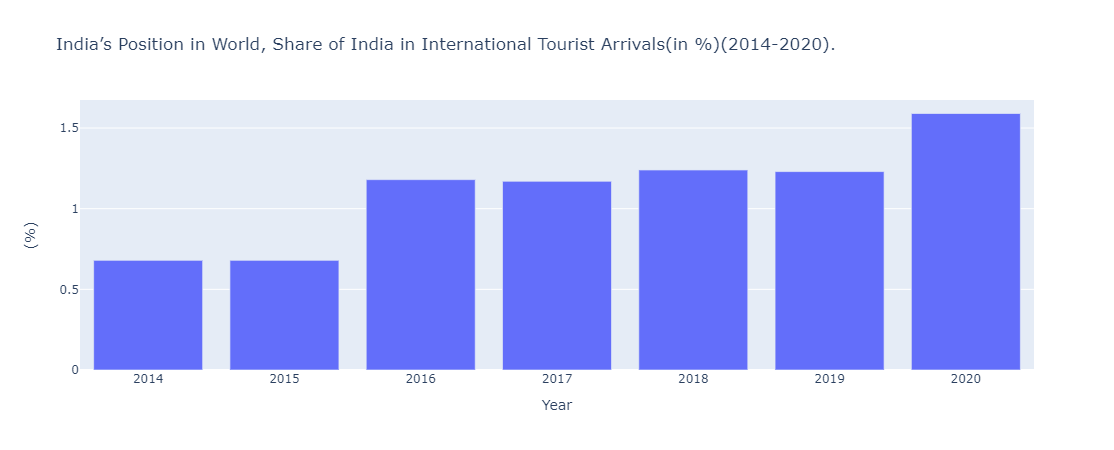

In [19]:
fig4 = px.bar(general, x="year", y="ipwiita", 
       labels={"year":"Year", "ipwiita": "(%)"},
       title="India’s Position in World, Share of India in International Tourist Arrivals(in %)(2014-2020).")
fig4.show()

**Let's see how much money these tourists generate each year and how that is linked to the amount of visiting tourists on only the foreign exchange earnings in US$**

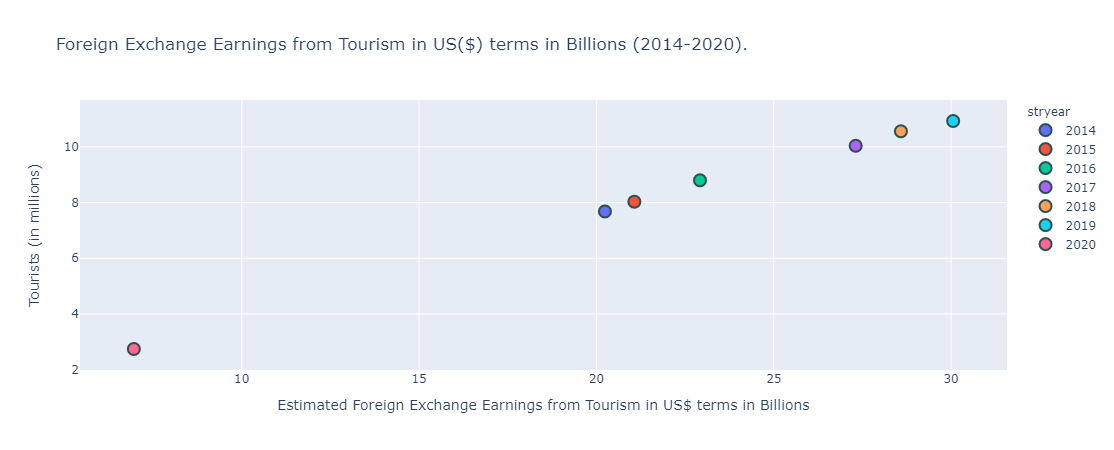

In [20]:
#Plotting the scattergraph with Plotly
general["stryear"] = general["year"].astype("object")
fig3 = px.scatter(general, x="feeftust", y="noftaii",color="stryear", 
       labels={"feeftust":"Estimated Foreign Exchange Earnings from Tourism in US$ terms in Billions", "noftaii": "Tourists (in millions)"},
       title="Foreign Exchange Earnings from Tourism in US($) terms in Billions (2014-2020).",
       hover_data=["year"])

#customizing the scatter plot
fig3.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig3.update_layout(showlegend=True)
fig3.show()

In [21]:
#Creating new column to get the absolute number of India level International Tourism Receipts in US$ Billion 
#world level International Tourism Receipts in US$ Billion * Share of India in International Tourism Receipts (US$ terms) (in %)
general["spendinIndia"] = (general["witr"] * general["ipwsiitr"]) / 100

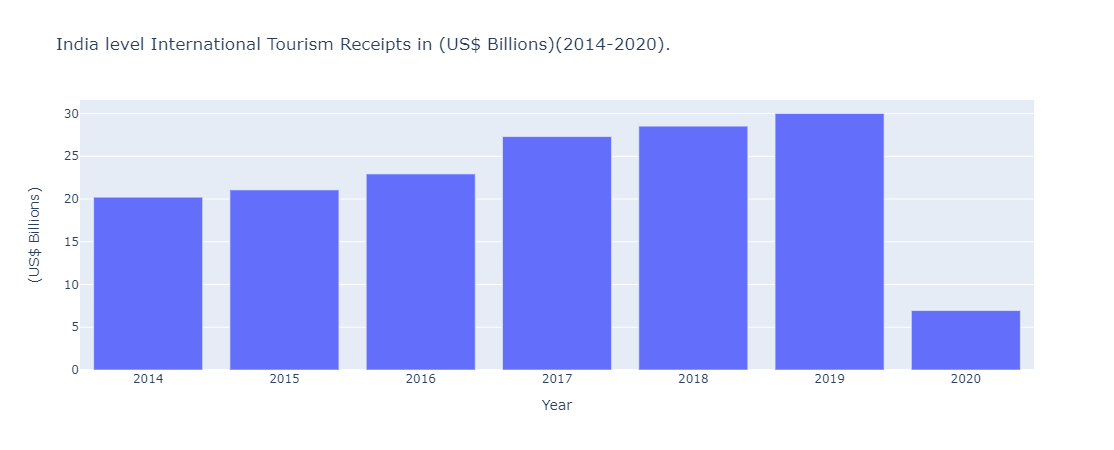

In [22]:
fig5 = px.bar(general, x="year", y="spendinIndia", 
       labels={"year":"Year", "spendinIndia": "(US$ Billions)"},
       title="India level International Tourism Receipts in (US$ Billions)(2014-2020).")
fig5.show()

**The amount of income of money out of tourism and the arriving tourists were rising till 2019. The corona crisis led to a decrease in both.**